<a href="https://colab.research.google.com/github/MelsonHeo00/Summer_MicroCredential/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Part 1: Overview
## In this project, we will be going over the data of diabetes within the 10 years mark between 1999 and 2008. In this analysis, we want to predict how often the patient will go back to the hospital based on the other variables.

# Part 2: Data Exploration (EDA) and Data Cleaning

## Loading up the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Loading up the data

In [2]:
# Using pandas to load up and read the raw data
df = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/ML-Data/main/dataset_diabetes.csv')

## EDA Part

In [3]:
# Checks to see if the data is running smoothly
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Checks the shape of the data
df.shape

(101766, 50)

In [5]:
# To check if there is any null values within the columns
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Conclusion: We can conclude that the data has no null values. However, we have to clean some of the data because there are objects and codes can not read objects. First, we have to check which columns having missing values although they are not null

In [7]:
# Checking for missing values in dataset
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

col
# Note: I found this part online because this gives an insight on the reasoning on deleting some of the columns

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


'readmitted'

In [8]:
# Dropping weight, payer_code, and medical_specialty as it provides too many missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [9]:
# In this section, we will be replacing the unknown values with something else since there were not many missing values

# Removing any ? within race
df = df[df['race'] != '?']

# Removing any Unknown/Invalid within gender
df = df[df['gender'] != 'Unknown/Invalid']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  object
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [11]:
# Dropping some of the data because I was not sure how to handle and clean the data
df = df.drop(['diag_1', 'diag_2', 'diag_3', 
                  'metformin', 'repaglinide', 'nateglinide', 
                  'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                  'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                  'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                  'examide', 'citoglipton', 'glyburide-metformin', 
                  'glipizide-metformin', 'glimepiride-pioglitazone', 
                  'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1)

In [12]:
# I found this part online to replace the objects for integers for three of the columns listed below

# Changing the column admission_type_id from object to integer
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

# Changing the column discharge_disposition_id from object to integer
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

# Changing the column admission_source_id from object to integer
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  object
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

The two variables that we will be using for data visualization is between time_in_hospital and num_medications to view the correlation between the time and medications for each patient

## Data Visualization (before cleaning the data fully)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Readmitted')

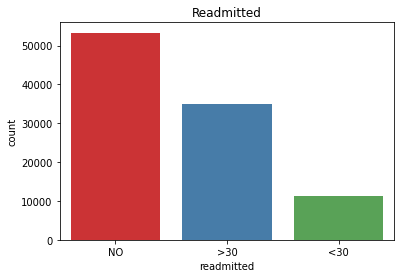

In [14]:
sns.countplot(df['readmitted'], palette = "Set1").set_title('Readmitted')

Analysis: This shows the readmitted patients based on 3 things where patients were not readmitted, patients were readmitted less than 30 days and after 30 days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


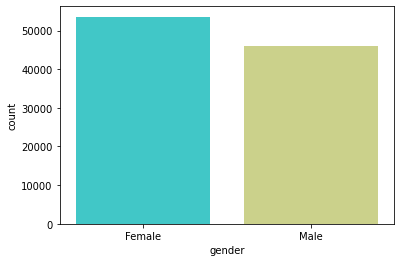

In [15]:
sns.countplot(df['gender'], palette = "rainbow")

Analysis: This shows the gender between male and female patients within the data. Note, I did take out the unknown because it provided too little data which was not needed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '[0-10)'),
 Text(0, 0, '[10-20)'),
 Text(0, 0, '[20-30)'),
 Text(0, 0, '[30-40)'),
 Text(0, 0, '[40-50)'),
 Text(0, 0, '[50-60)'),
 Text(0, 0, '[60-70)'),
 Text(0, 0, '[70-80)'),
 Text(0, 0, '[80-90)'),
 Text(0, 0, '[90-100)')]

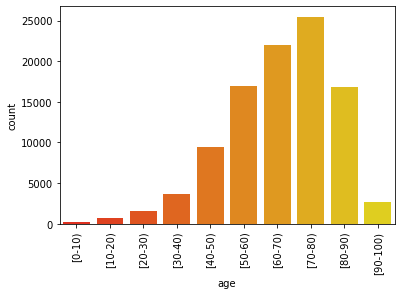

In [16]:
ax = sns.countplot(df['age'], palette = 'autumn')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Analysis: This shows the age group within the data that were involved in.

## Changing object to integer

In [17]:
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [18]:
# Checking any unique values for the column diabetesMed
df['diabetesMed'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
# Replacing all of the objects with integers
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  object
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [20]:
# Checking any unique values for the column readmitted
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [21]:
# Replacing all of the objects with integers
df['readmitted'] = df['readmitted'].replace(['NO'], 0)
df['readmitted'] = df['readmitted'].replace(['>30'], 1)
df['readmitted'] = df['readmitted'].replace(['<30'], 1)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  object
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [22]:
# Checking any unique values for the column gender
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
# Replacing all of the objects with integers
df['gender'] = df['gender'].replace(['Male'], 1 )
df['gender'] = df['gender'].replace(['Female'], 0 )

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  int64 
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [24]:
# Checking any unique values for the column age
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [25]:
# Replacing all of the objects with integers
df['age'] = df['age'].replace(['[0-10)'], 0)
df['age'] = df['age'].replace(['[10-20)'], 1)
df['age'] = df['age'].replace(['[20-30)'], 2)
df['age'] = df['age'].replace(['[30-40)'], 3)
df['age'] = df['age'].replace(['[40-50)'], 4)
df['age'] = df['age'].replace(['[50-60)'], 5)
df['age'] = df['age'].replace(['[60-70)'], 6)
df['age'] = df['age'].replace(['[70-80)'], 7)
df['age'] = df['age'].replace(['[80-90)'], 8)
df['age'] = df['age'].replace(['[90-100)'], 9)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  int64 
 4   age                       99492 non-null  int64 
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [26]:
# Checking any unique values for the column race
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [27]:
# Replacing all of the objects with integers
df['race'] = df['race'].replace(['Caucasian'], 0)
df['race'] = df['race'].replace(['AfricanAmerican'], 1)
df['race'] = df['race'].replace(['Other'], 2)
df['race'] = df['race'].replace(['Asian'], 3)
df['race'] = df['race'].replace(['Hispanic'], 4)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  int64 
 3   gender                    99492 non-null  int64 
 4   age                       99492 non-null  int64 
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [28]:
# Checking any unique values for the column change
df['change'].unique()

array(['No', 'Ch'], dtype=object)

In [29]:
# Replacing all of the objects with integers
df['change'] = df['change'].replace(['No'], 0)
df['change'] = df['change'].replace(['Ch'], 1)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  int64 
 3   gender                    99492 non-null  int64 
 4   age                       99492 non-null  int64 
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [30]:
# Checking any unique values for the column A1Cresult
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [31]:
# Replacing all of the objects with integers
df['A1Cresult'] = df['A1Cresult'].replace(['None'], 0)
df['A1Cresult'] = df['A1Cresult'].replace(['>7'], 1)
df['A1Cresult'] = df['A1Cresult'].replace(['>8'], 2)
df['A1Cresult'] = df['A1Cresult'].replace(['Norm'], 3)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  int64 
 3   gender                    99492 non-null  int64 
 4   age                       99492 non-null  int64 
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [32]:
# Checking any unique values for the column insulin
df['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [33]:
# Replacing all of the objects with integers
df['insulin'] = df['insulin'].replace(['No'], 0)
df['insulin'] = df['insulin'].replace(['Up'], 1)
df['insulin'] = df['insulin'].replace(['Steady'], 2)
df['insulin'] = df['insulin'].replace(['Down'], 3)

# Confirming if the column was converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              99492 non-null  int64
 1   patient_nbr               99492 non-null  int64
 2   race                      99492 non-null  int64
 3   gender                    99492 non-null  int64
 4   age                       99492 non-null  int64
 5   admission_type_id         99492 non-null  int64
 6   discharge_disposition_id  99492 non-null  int64
 7   admission_source_id       99492 non-null  int64
 8   time_in_hospital          99492 non-null  int64
 9   num_lab_procedures        99492 non-null  int64
 10  num_procedures            99492 non-null  int64
 11  num_medications           99492 non-null  int64
 12  number_outpatient         99492 non-null  int64
 13  number_emergency          99492 non-null  int64
 14  number_inpatient          99492 non-n

## Data Visualization (after cleaning the data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Readmitted')

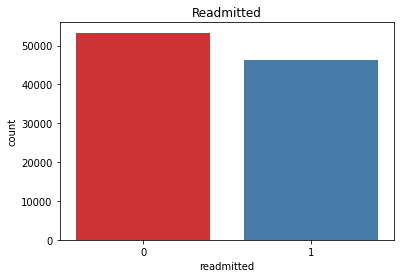

In [34]:
sns.countplot(df['readmitted'], palette = "Set1").set_title('Readmitted')

Analysis: This graph shows how many people were readmitted, 1 represents yes and 0 represents no. As shown, this data has been successfully converted from NO -> 0 and >30 and <30 -> 1

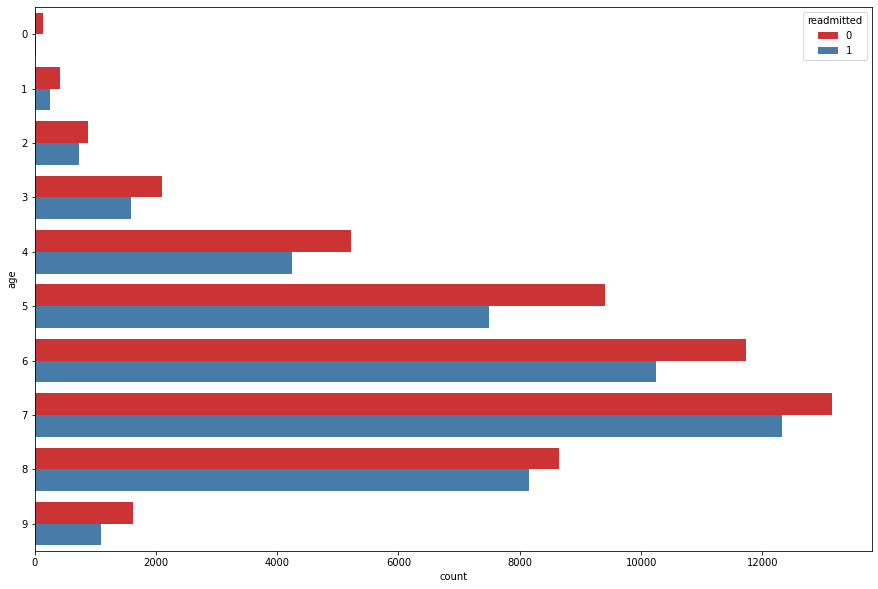

In [35]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted'], palette = "Set1")

Analysis: This shows the amount of people that got readmitted based on the age range. This shows that the age range was successfully converted to integers. With this, we can move on and start building models

# Part 3: Building and Evaluating Models

## Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["readmitted"], axis = 1), df['readmitted'], test_size = 0.50, random_state = 1)

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65     26672
           1       0.55      0.34      0.42     23074

    accuracy                           0.57     49746
   macro avg       0.56      0.55      0.54     49746
weighted avg       0.56      0.57      0.55     49746



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[20385  6287]
 [15253  7821]]


In [42]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred = classifier.predict(X_test)
predictions = classifier.predict(X_test)

## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
pred = knn.predict(X_test)

In [46]:
print(confusion_matrix(y_test, pred))

[[15222 11450]
 [11508 11566]]


In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57     26672
           1       0.50      0.50      0.50     23074

    accuracy                           0.54     49746
   macro avg       0.54      0.54      0.54     49746
weighted avg       0.54      0.54      0.54     49746



## Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60     26672
           1       0.54      0.55      0.55     23074

    accuracy                           0.57     49746
   macro avg       0.57      0.57      0.57     49746
weighted avg       0.57      0.57      0.57     49746



In [51]:
print(confusion_matrix(y_test, predictions))

[[15839 10833]
 [10355 12719]]


## Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60)

In [53]:
predictions_rfc = rf.predict(X_test)

In [54]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69     26672
           1       0.64      0.56      0.60     23074

    accuracy                           0.65     49746
   macro avg       0.65      0.64      0.64     49746
weighted avg       0.65      0.65      0.65     49746



In [55]:
print(confusion_matrix(y_test, predictions_rfc))

[[19361  7311]
 [10164 12910]]


# Part 4: Select Models

# Conclusion: I would choose the random forest model because it outputs a higher accuracy in comparison to the 3 other models.